In [8]:
from PIL import Image, ImageDraw, ImageFont
import pandas as pd

In [9]:
font = ImageFont.truetype(
    'MyriadPro-Regular.otf',
    size=130 # font size according to resolution
)
color = 'rgb(76, 76, 78)' # black color

In [10]:
data = pd.read_excel('test.xlsx')
data

Username          Name
0  jetsoanalin  Jetso Analin

In [25]:
# all values in pixels (taken from mspaint)
Ys = [1200] # y coordinate of the blanks
Xstart = [1011] # X coordinate of beginning of blanks
Xend = [2243] # X coordinate of end of blanks

file_names = []
for i in range(len(data)):
    name = data.loc[i]['Name'].title()
    image = Image.open('template.jpg') # path to template
    name = name.title().strip()

    print('{}/{} - {}'.format(i+1, len(data), name))
        
    draw = ImageDraw.Draw(image)
        
    # centering text
    MAX_W = Xend[0] - Xstart[0] 
    w, h = draw.textsize(name, font=font)
    draw.text((Xstart[0]+(MAX_W-w)//2, Ys[0]), name, fill=color, font=font)
    
    file_name = f"{name.replace(' ', '')}_{data.loc[i]['Username']}.pdf"
    image.save(file_name, 'pdf')
    file_names.append(file_name)
    
print('Done')

1/1 - Jetso Analin
Done


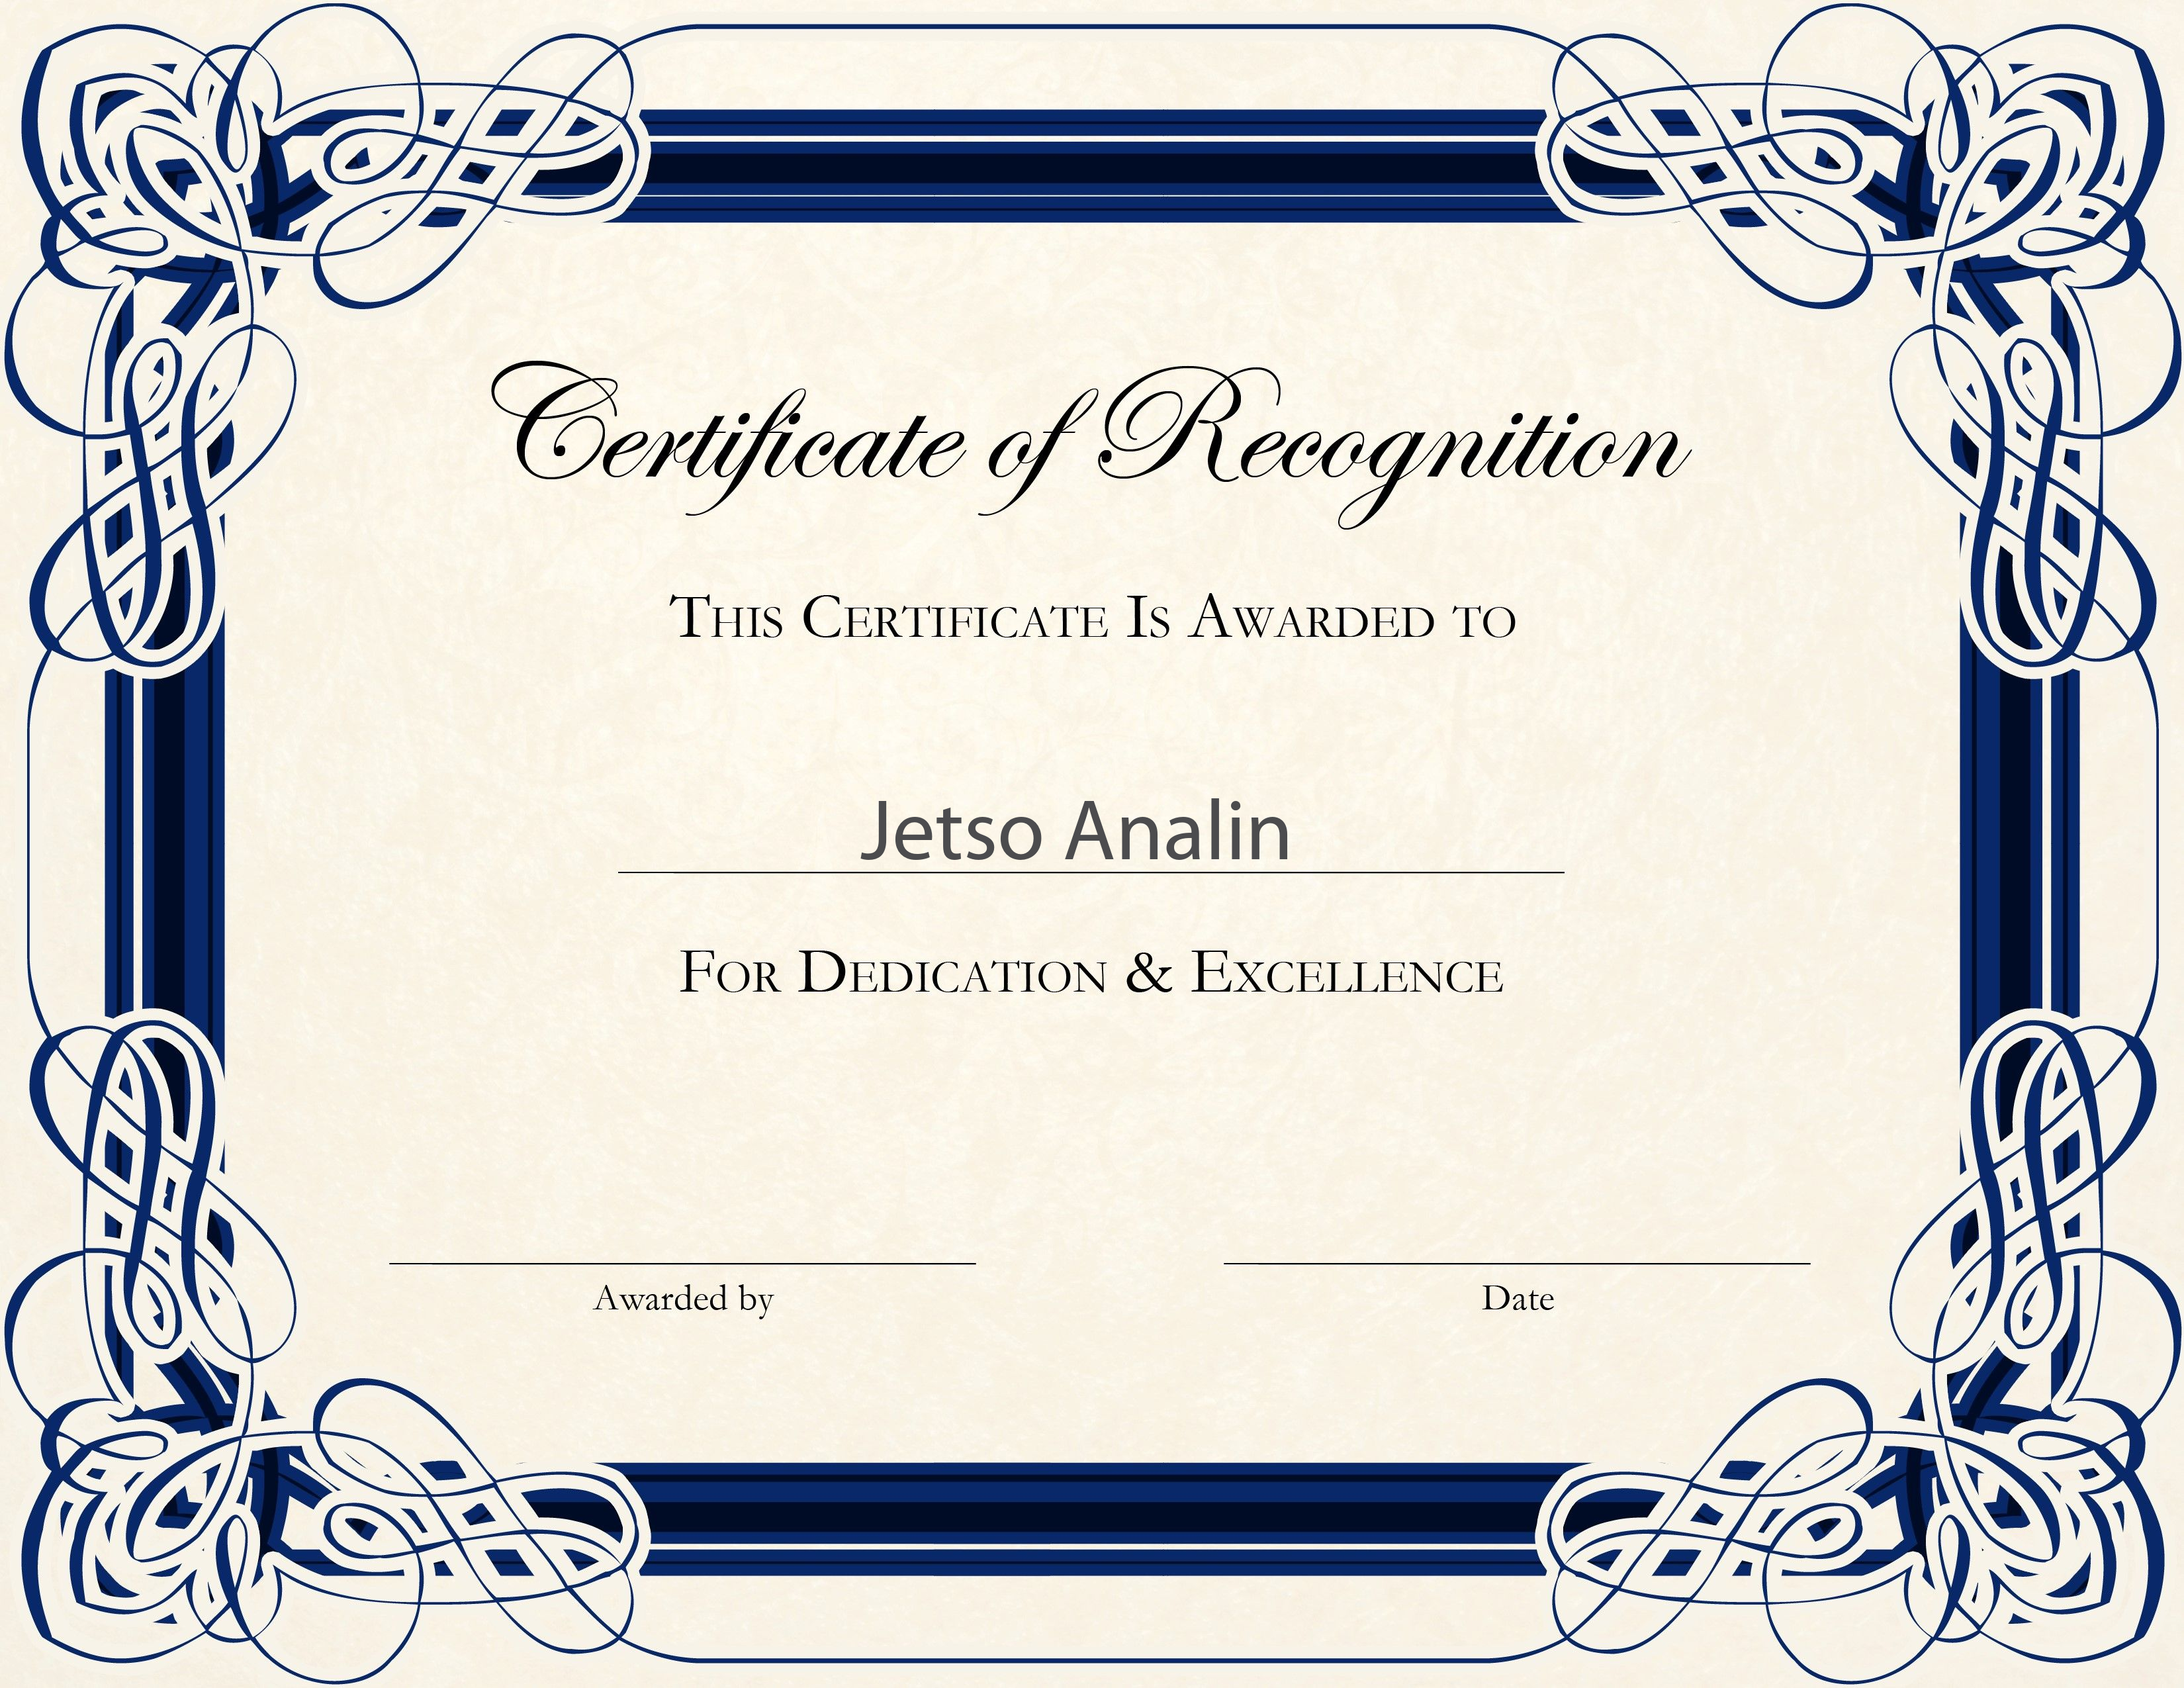

In [26]:
image

In [28]:
data_ = pd.concat([data, pd.Series(file_names, name='FileName')], axis=1)
data_.to_excel('testfilesname.xlsx')